# **Practical No. 4**

# **Developing a recommendation system using collaborative filtering or deep learning approaches.**

Required Modules

**Input** is used to define the entry point of a Keras model.

***Used to instantiate a Keras tensor.***

It creates a tensor placeholder that specifies the shape and data type of the inputs your model will receive.

Input(shape=(1,)) to accept one user ID or one item ID at a time.

These IDs are integers, and the input shape (1,) means a single number per example.

-------------------------------------------------------------------------

The **Embedding** layer maps discrete integer IDs to dense vectors — called embeddings.

***Turns positive integers (indexes) into dense vectors of fixed size.***

It’s like a lookup table: each integer index (like a user ID or item ID) is associated with a learnable vector.

These vectors capture latent features or properties, learned during training.

Raw IDs (like user 42 or item 7) have no numeric meaning by themselves.

Embeddings turn these IDs into meaningful vectors of fixed size (e.g., 20 dimensions).

This helps the model learn similarities and patterns between users or items.

**input_dim** = number of unique IDs (e.g., total users or items)

**output_dim** = size of the embedding vector (e.g., 20)

When the model sees an ID, it returns the corresponding vector.


-------------------------------------------------------------------------

The **Dot** layer computes the dot product (also called scalar product) between two tensors along specified axes.

***Computes element-wise dot product of two tensors.***

It’s a way to measure similarity or interaction between vectors.

Often used in recommendation systems to compute the similarity between user and item embeddings.

Eg. if two input tensors are provided

User embedding vector: shape (batch_size, embedding_dim)

Item embedding vector: shape (batch_size, embedding_dim)

It computes the dot product along the embedding dimension for each batch item.

The dot product between user and item embeddings estimates how well a user matches an item.

Higher dot product = higher predicted rating or affinity.


-----------------------------------------------------------------------------

The **Flatten** layer converts a multi-dimensional tensor into a 1D tensor by collapsing all dimensions except the batch size.

It essentially reshapes the input from something like (batch_size, height, width, channels) to (batch_size, height * width * channels).

This is useful to prepare data for fully connected (Dense) layers or for output layers that expect flat vectors.

After computing the dot product between user and item embeddings, the output often has shape (batch_size, 1, 1).

The Flatten layer converts this to (batch_size, 1) so it matches the shape expected by the loss function and output layer.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten
from tensorflow.keras.models import Model

In [2]:
# Sample user-item-rating data
ratings = np.array([
    [0, 0, 5.0],  # user 0 rated item 0 with 5
    [0, 1, 3.0],  # user 0 rated item 1 with 3
    [1, 0, 4.0],  # user 1 rated item 0 with 4
    [1, 2, 2.0],  # user 1 rated item 2 with 2
    [2, 1, 4.0],  # user 2 rated item 1 with 5
    [2, 2, 5.0],  # user 2 rated item 2 with 5
])

In [3]:
ratings

array([[0., 0., 5.],
       [0., 1., 3.],
       [1., 0., 4.],
       [1., 2., 2.],
       [2., 1., 4.],
       [2., 2., 5.]])

In [4]:
# Number of users and items
num_users = int(np.max(ratings[:, 0])) + 1  # 3 users
num_items = int(np.max(ratings[:, 1])) + 1  # 3 items
embedding_size = 2

NumPy slicing to extract a specific column from a 2D NumPy array named ratings.
: → selects all rows.
0 → selects the first column.

In [5]:
ratings[:, 0]

array([0., 0., 1., 1., 2., 2.])

In [6]:
print(np.max(ratings[:, 0]),'\n',int(np.max(ratings[:, 0])))

2.0 
 2


creates an input layer in a Keras model that expects a single value as input

shape=(1,) - the input is a 1-dimensional vector of size 1.
Eg. [3], [15], [102] (a single integer in a list).

used in embedding-based models, where each ID is mapped to a vector.

A user ID (e.g., 0, 1, 2, ...)

An item ID (e.g., 0, 1, 2, ...)

In [7]:
# Inputs for user and item
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

setting the dimension of the latent (hidden) space in which both users and items will be embedded.

embedding_size = 2
Each user and each item will be represented by a 2D vector (i.e., an array of 2 numbers).

These vectors are learned during training.

The dot product of the user and item vectors will be used to predict the rating.

eg.
User 0 might be embedded as: [0.9, 0.2]

Item 3 might be embedded as: [0.4, 0.7]

The predicted rating = dot product

(0.9 × 0.4) + (0.2 × 0.7) = 0.36 + 0.14 = 0.50


creates an embedding layer and applies it to the user_input.
to convert a user ID (an integer) into a dense vector (embedding) of fixed size.

two embedding layers are created:

One for users

One for items

Then their dot product to predict a rating or interaction score.

eg.

num_users = 5
embedding_size = 2
user_input = Input(shape=(1,))

user_embedding = Embedding(input_dim=5, output_dim=2)(user_input)

creates a user embedding matrix of shape (5, 2)


num_users = total users

num_items = total items

embedding_size = dimensionality of feature vectors (e.g., 20)

Each user/item gets represented as a learned vector summarizing their preferences or characteristics.


In [8]:
embedding_size = 2
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size)(user_input)
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size)(item_input)

In [9]:
#eg. to understand embedding

from tensorflow.keras.layers import Embedding
import tensorflow as tf

# Suppose 5 unique items, embedding size 3
embedding_layer = Embedding(input_dim=5, output_dim=2)

# Input IDs (batch of 2 items)
input_ids = tf.constant([[1], [3]])

# Get embeddings
output_vectors = embedding_layer(input_ids)

print(output_vectors)


#creates 2 samples, each with a 1-length sequence, each mapped to a 3D vector.

tf.Tensor(
[[[-0.0037593   0.02323277]]

 [[ 0.01436334 -0.01565754]]], shape=(2, 1, 2), dtype=float32)


axes=2 - compute the dot product along the last axis (the embedding dimension) -- the one with the highest index — the last dimension of the shape..

It performs the dot product between the user and item vectors for each sample in the batch.

Output shape - (batch_size, 1, 1) — a single dot product score per user-item pair.

In [10]:
# Dot product of user and item embeddings
dot_product = Dot(axes=2)([user_embedding, item_embedding])

In [11]:
#Eg. to understand dot

user_vector  = [0.2, 0.5]
item_vector  = [0.4, 0.7]
#dot_product  = 0.2*0.4 + 0.5*0.7 = 0.08 + 0.35 = 0.43

embedding_size=2
predicted_rating = sum(user_vector[i] * item_vector[i] for i in range(embedding_size))
print(predicted_rating)

0.43


flattens the output of the previous Dot layer — it removes extra dimensions so that the output becomes a 1D tensor (vector) for each input pair.

output of the Dot layer is typically a 3D tensor with shape

Eg.
(batch_size, 1, 1)
Each prediction (dot product) is wrapped inside two singleton dimensions.

[[[4.2]],
 [[3.8]],
 [[2.5]]]

this shape is not convenient for

Returning predictions

Comparing with true values (which are 1D)

Plotting or evaluating with metrics

Flatten()

[4.2, 3.8, 2.5]  # shape: (batch_size,)



In [12]:
# Flatten the result
dot_product = Flatten()(dot_product)

creates a Keras model

Takes two inputs:

user_input: a single user ID

item_input: a single item ID

Outputs:

dot_product: the predicted rating from the dot product of user and item embeddings

matrix factorization method, needs both a user ID and an item ID to make a prediction

user_input --> user embedding layer
item_input --> item embedding layer
These embeddings are then combined (via Dot) and flattened to produce the predicted rating.



In [13]:
# Define the model
model = Model(inputs=[user_input, item_input], outputs=dot_product)

Adam is a optimization algorithm that adjusts the model's weights to minimize the loss during training.

MSE (Mean Squared Error) calculates the average of the squares of the differences between the predicted ratings and the true ratings.
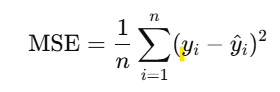

Used in regression problems

predicting continuous ratings in recommender systems.

The optimizer determines how the model learns.

The loss function tells the model what to minimize during training (how far off the predictions are from actual values).

In [14]:
model.compile(optimizer='adam', loss='mse')

In [15]:
# Training data
X_users = ratings[:, 0].astype('int32')
X_items = ratings[:, 1].astype('int32')
y_ratings = ratings[:, 2].astype('float32')

In [16]:
X_users

array([0, 0, 1, 1, 2, 2], dtype=int32)

In [17]:
X_items

array([0, 1, 0, 2, 1, 2], dtype=int32)

In [18]:
y_ratings

array([5., 3., 4., 2., 4., 5.], dtype=float32)

In [19]:
# Train the model
model.fit([X_users, X_items], y_ratings, epochs=100, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 15.8359
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 15.8352
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 15.8346
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 15.8340
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 15.8334
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 15.8328
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 15.8322
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 15.8316
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 15.8310
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 15.8304
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 15.8298
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 15.8292
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 15.8286
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 15.8279
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 15.8273
Epoch

In [20]:
# Predict a rating for user 0 on item 2
user_id = np.array([0])
item_id = np.array([2])
predicted = model.predict([user_id, item_id])
print(f"Predicted rating for user 0 on item 2: {predicted[0].item():.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted rating for user 0 on item 2: 0.03


User Ids   |    Item Ids    |   Ratings

0          |       2        |      ?

1          |       0        |      ?

2          |       1        |      ?


In [21]:
# Predict for multiple user-item pairs
user_ids = np.array([0, 1, 2])
item_ids = np.array([2, 0, 1])
predicted_batch = model.predict([user_ids, item_ids])
for u, i, p in zip(user_ids, item_ids, predicted_batch):
    print(f"Predicted rating for user {u} on item {i}: {p.item():.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted rating for user 0 on item 2: 0.03
Predicted rating for user 1 on item 0: 0.03
Predicted rating for user 2 on item 1: 0.05


In [22]:
ratings

array([[0., 0., 5.],
       [0., 1., 3.],
       [1., 0., 4.],
       [1., 2., 2.],
       [2., 1., 4.],
       [2., 2., 5.]])

zip combines three lists or arrays into one iterable of tuples.

Each tuple will contain:

One user ID

One item ID

One predicted rating

In [23]:
# Predict for multiple user-item pairs
user_ids = np.array([0, 1, 2])
item_ids = np.array([0, 2, 1])
predicted_batch = model.predict([user_ids, item_ids])
for u, i, p in zip(user_ids, item_ids, predicted_batch):
    print(f" User {u} - item {i} - Predicted rating : {p.item():.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
 User 0 - item 0 - Predicted rating : 0.03
 User 1 - item 2 - Predicted rating : 0.04
 User 2 - item 1 - Predicted rating : 0.05
